In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R

require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [5]:
# show all columns in the dataframe

pd.set_option('display.max_columns', None)

In [6]:
df_counts = pd.read_csv('merged_CB_smoke_data.csv')

In [7]:
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835


In [37]:
# min max of df['population']
df_counts['population'].min(), df_counts['population'].max()

(87280, 248158)

In [8]:
# Add a column named sum, which is the sum of Active Tobacco Retail Dealer Licenses and Active Electronic Cigarette Retail Dealer Licenses
df_counts['total_count'] = df_counts['Active Tobacco Retail Dealer Licenses'] + df_counts['Active Electronic Cigarette Retail Dealer Licenses']

In [9]:
df_counts['black_pct'] = df_counts['black_population']/df_counts['population']
df_counts['asian_pct'] = df_counts['asian_population']/df_counts['population']
df_counts['hispanic_pct'] = df_counts['hispanic_population']/df_counts['population']

In [10]:
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143


In [20]:
df_counts['retailers_per_1000'] = df_counts['total_count'] / df_counts['population'] * 1000
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166


In [64]:
#export df_clean as csv
df_counts.to_csv('CB-Final_2.csv', index=False)

In [65]:
%%R

df <- read.csv('CB-Final_2.csv')
head(df)

  code      name Tobacco.Retail.Dealer.Cap
1    1 Bronx 1&2                        99
2    1  Bronx 10                        52
3    1  Bronx 11                        55
4    1  Bronx 12                        66
5    1 Bronx 3&6                       103
6

    1   Bronx 4                        88
  Active.Tobacco.Retail.Dealer.Licenses TRD.Available.Under.Cap
1                                    75                      24
2                                    65                       0
3                                    60                       0
4                                    64                       2
5                                    91                      12
6                                    75                      13
  Electronic.Cigarette.Retail.Dealer.Cap
1                                     18
2                                     30
3                                     19
4                                     21
5                                     15
6                                      9
  Active.Electronic.Cigarette.Retail.Dealer.Licenses ECD.Available.Under.Cap
1                                                 15                       3
2                                                 37                 

In [66]:
%%R
# Print all column names
names(df)

 [1] "code"                                              
 [2] "name"                                              
 [3] "Tobacco.Retail.Dealer.Cap"                         
 [4] "Active.Tobacco.Retail.Dealer.Licenses"             
 [5] "TRD.Available.Under.Cap"                           
 [6] "Electronic.Cigarette.Retail.Dealer.Cap"            
 [7] "Active.Electronic.Cigarette.Retail.Dealer.Licenses"
 [8] "ECD.Available.Under.Cap"                           
 [9] "activer.per.1000"                                  
[10] "income"                                            
[11] "poverty"                                           
[12] "age_med"                                           
[13] "population"                                        
[14] "black_population"                                  
[15] "asian_population"                                  
[16] "hispanic_population"                               
[17] "occupied_unit"                                     
[18] "vacant_u

In [24]:
%%R
#require ggplot
library(ggplot2)

# Total counts ~ age_med

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_count ~ age_med, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.852 -32.749 -13.042   5.994 315.324 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) 110.32689   68.79462   1.604    0.115
age_med      -0.07051    1.66536  -0.042    0.966

Residual standard error: 63.04 on 53 degrees of freedom
Multiple R-squared:  3.382e-05,	Adjusted R-squared:  -0.01883 
F-statistic: 0.001793 on 1 and 53 DF,  p-value: 0.9664



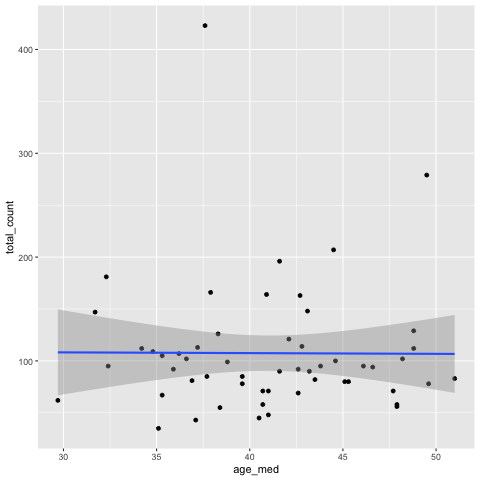

In [67]:
%%R 

plot <- ggplot(df, aes(x = age_med, y = total_count)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_count ~ age_med, data = df)
summary(model)

# total active per 1000 ~ med_age

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = retailers_per_1000 ~ age_med, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35825 -0.23060 -0.09546  0.04348  1.61909 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.442266   0.407794   1.085    0.283
age_med     0.006622   0.009872   0.671    0.505

Residual standard error: 0.3737 on 53 degrees of freedom
Multiple R-squared:  0.008419,	Adjusted R-squared:  -0.01029 
F-statistic:  0.45 on 1 and 53 DF,  p-value: 0.5052



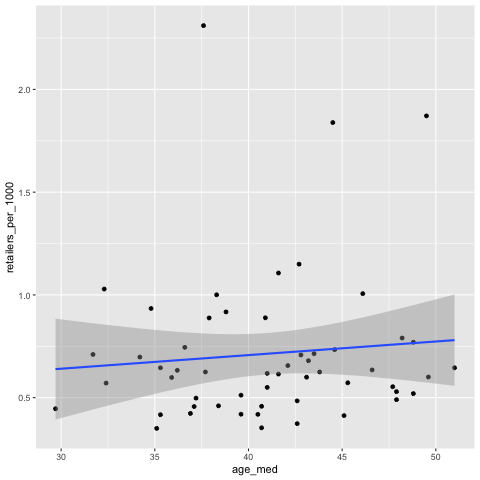

In [68]:
%%R 

plot <- ggplot(df, aes(x = age_med, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(retailers_per_1000 ~ age_med, data = df)
summary(model)

# active e-cig ~ med_age

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = Active.Electronic.Cigarette.Retail.Dealer.Licenses ~ 
    age_med, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.783 -18.616  -6.921   6.457 138.202 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  23.1044    30.3362   0.762    0.450
age_med       0.2578     0.7344   0.351    0.727

Residual standard error: 27.8 on 53 degrees of freedom
Multiple R-squared:  0.00232,	Adjusted R-squared:  -0.0165 
F-statistic: 0.1232 on 1 and 53 DF,  p-value: 0.7269



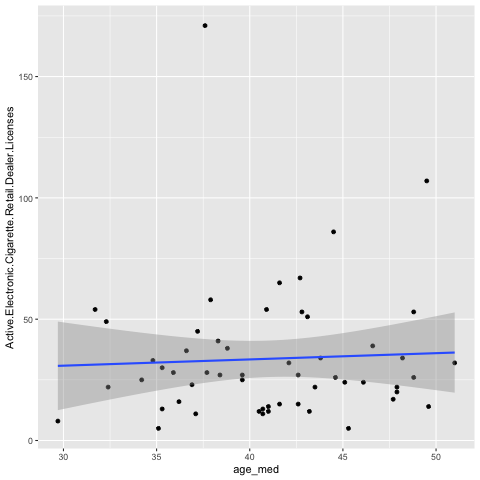

In [69]:
%%R 

plot <- ggplot(df, aes(x = age_med, y = Active.Electronic.Cigarette.Retail.Dealer.Licenses)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(Active.Electronic.Cigarette.Retail.Dealer.Licenses ~ age_med, data = df)
summary(model)

# total_count ~ income

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = total_count ~ income, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.809 -28.587  -9.185  22.573 248.273 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.766e+01  1.951e+01   1.417    0.162    
income      1.030e-03  2.338e-04   4.405 5.17e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.93 on 53 degrees of freedom
Multiple R-squared:  0.268,	Adjusted R-squared:  0.2542 
F-statistic: 19.41 on 1 and 53 DF,  p-value: 5.166e-05



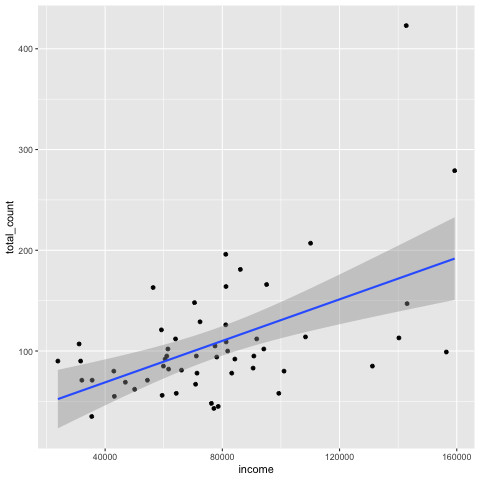

In [70]:
%%R 

plot <- ggplot(df, aes(x = income, y = total_count)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_count ~ income, data = df)
summary(model)

# total_count per 1000 ~ income

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = retailers_per_1000 ~ income, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60056 -0.18099 -0.06868  0.14044  1.19659 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.395e-01  1.162e-01   2.060   0.0443 *  
income      6.124e-06  1.393e-06   4.398 5.31e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3212 on 53 degrees of freedom
Multiple R-squared:  0.2673,	Adjusted R-squared:  0.2535 
F-statistic: 19.34 on 1 and 53 DF,  p-value: 5.305e-05



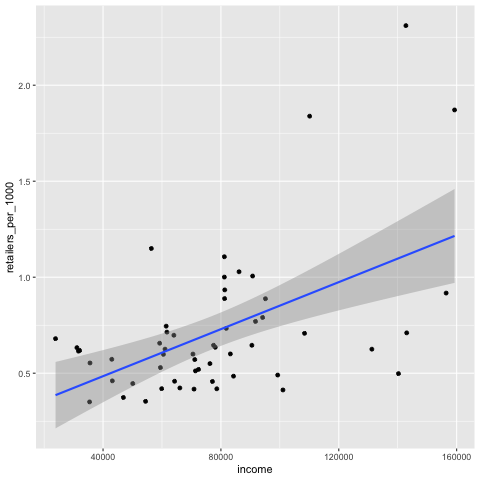

In [71]:
%%R 

plot <- ggplot(df, aes(x = income, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(retailers_per_1000 ~ income, data = df)
summary(model)

# total_count ~ poverty rate

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_count ~ poverty, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-79.91 -30.29 -14.08  12.91 291.02 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  154.853     19.053   8.128    7e-11 ***
poverty       -2.542      0.928  -2.739  0.00838 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 59 on 53 degrees of freedom
Multiple R-squared:  0.124,	Adjusted R-squared:  0.1075 
F-statistic: 7.501 on 1 and 53 DF,  p-value: 0.008378



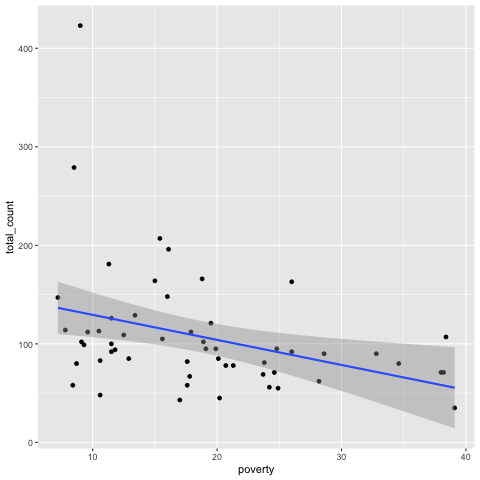

In [72]:
%%R 

plot <- ggplot(df, aes(x = poverty, y = total_count)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_count ~ poverty, data = df)
summary(model)

# retailers per 1000 ~ poverty rate

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = retailers_per_1000 ~ poverty, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43801 -0.19941 -0.08177  0.10577  1.46373 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.970488   0.114792   8.454 2.12e-11 ***
poverty     -0.013763   0.005591  -2.462   0.0171 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3555 on 53 degrees of freedom
Multiple R-squared:  0.1026,	Adjusted R-squared:  0.08567 
F-statistic: 6.059 on 1 and 53 DF,  p-value: 0.01712



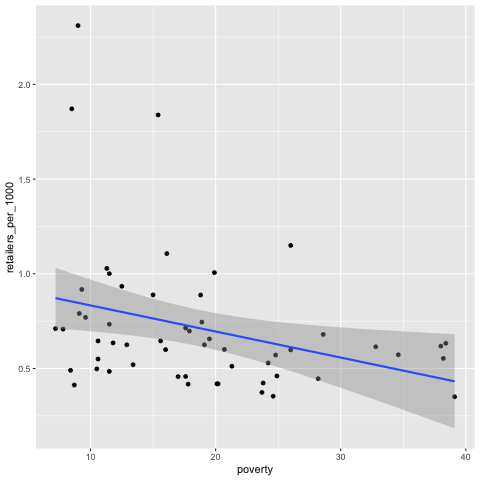

In [73]:
%%R 

plot <- ggplot(df, aes(x = poverty, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(retailers_per_1000 ~ poverty, data = df)
summary(model)

# total count ~ black_pct

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = total_count ~ black_pct, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-75.33 -29.45 -14.68  11.88 290.79 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   140.05      11.81  11.862  < 2e-16 ***
black_pct    -121.77      33.69  -3.614 0.000671 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56.46 on 53 degrees of freedom
Multiple R-squared:  0.1977,	Adjusted R-squared:  0.1826 
F-statistic: 13.06 on 1 and 53 DF,  p-value: 0.0006708



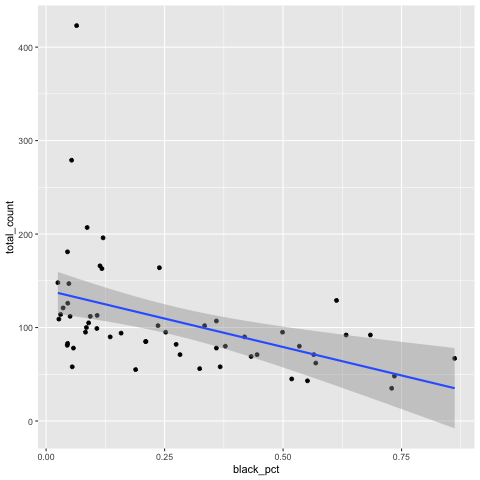

In [74]:
%%R 

plot <- ggplot(df, aes(x = black_pct, y = total_count)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_count ~ black_pct, data = df)
summary(model)

# retailers per 1000 ~ black_pct

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = retailers_per_1000 ~ black_pct, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45742 -0.17463 -0.05879  0.07254  1.44444 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.91408    0.06972   13.11  < 2e-16 ***
black_pct   -0.74798    0.19895   -3.76 0.000426 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3334 on 53 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.1956 
F-statistic: 14.13 on 1 and 53 DF,  p-value: 0.000426



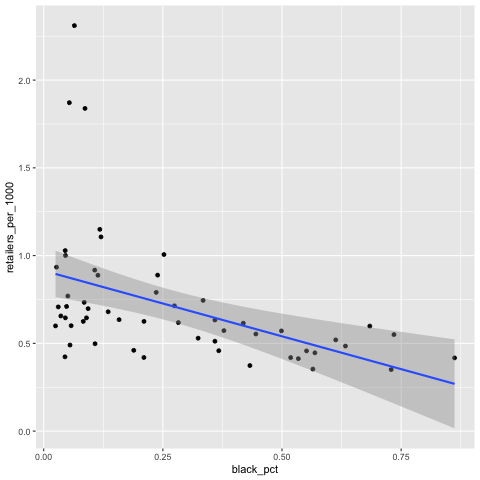

In [75]:
%%R 

plot <- ggplot(df, aes(x = black_pct, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(retailers_per_1000 ~ black_pct, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_count ~ hispanic_pct, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-77.60 -32.35 -10.09  13.28 299.74 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    128.81      14.01   9.191 1.48e-12 ***
hispanic_pct   -70.31      37.32  -1.884    0.065 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61.03 on 53 degrees of freedom
Multiple R-squared:  0.06278,	Adjusted R-squared:  0.04509 
F-statistic:  3.55 on 1 and 53 DF,  p-value: 0.06504



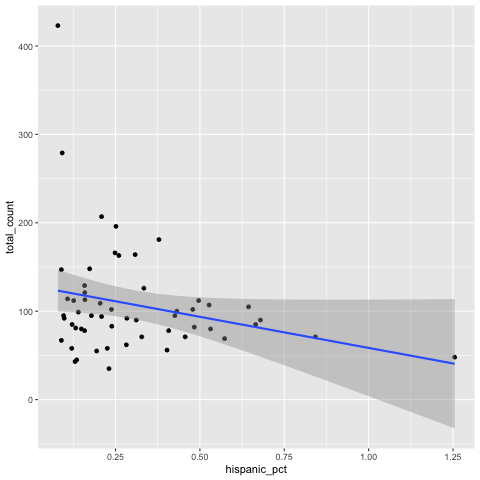

In [45]:
%%R 

plot <- ggplot(df, aes(x = hispanic_pct, y = total_count)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_count ~ hispanic_pct, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = retailers_per_1000 ~ hispanic_pct, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38325 -0.24862 -0.08490  0.06872  1.53498 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.79701    0.08501   9.376 7.63e-13 ***
hispanic_pct -0.27395    0.22635  -1.210    0.232    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3702 on 53 degrees of freedom
Multiple R-squared:  0.02689,	Adjusted R-squared:  0.008534 
F-statistic: 1.465 on 1 and 53 DF,  p-value: 0.2315



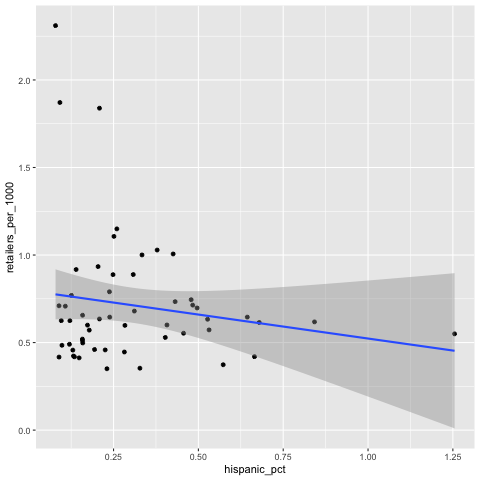

In [76]:
%%R 

plot <- ggplot(df, aes(x = hispanic_pct, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(retailers_per_1000 ~ hispanic_pct, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_count ~ asian_pct, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.153 -29.115 -11.884   2.454 308.587 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    90.34      13.52   6.679 1.48e-08 ***
asian_pct     106.50      66.49   1.602    0.115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 61.56 on 53 degrees of freedom
Multiple R-squared:  0.04617,	Adjusted R-squared:  0.02817 
F-statistic: 2.565 on 1 and 53 DF,  p-value: 0.1152



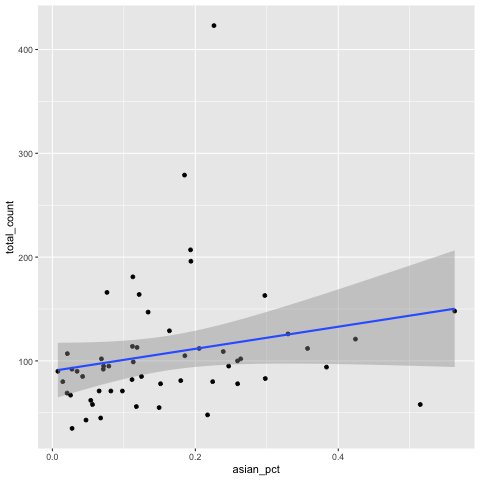

In [46]:
%%R 

plot <- ggplot(df, aes(x = asian_pct, y = total_count)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_count ~ asian_pct, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = retailers_per_1000 ~ asian_pct, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42060 -0.20023 -0.09323  0.03366  1.56015 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.62432    0.08095   7.712 3.23e-10 ***
asian_pct    0.55677    0.39799   1.399    0.168    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3685 on 53 degrees of freedom
Multiple R-squared:  0.03561,	Adjusted R-squared:  0.01742 
F-statistic: 1.957 on 1 and 53 DF,  p-value: 0.1676



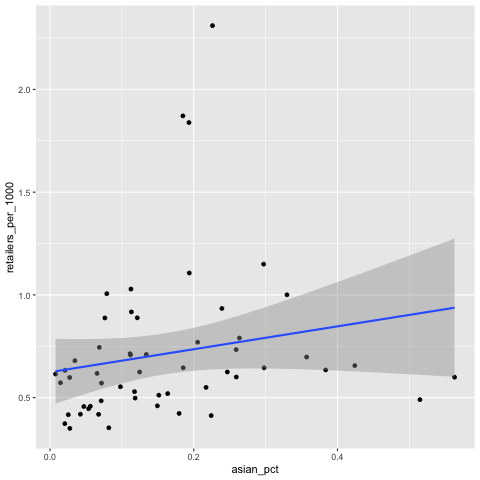

In [77]:
%%R 

plot <- ggplot(df, aes(x = asian_pct, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(retailers_per_1000 ~ asian_pct, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_count ~ vacant_occupied_ratio, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.027 -31.662   0.053  22.076 165.426 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)              40.35      11.99   3.365  0.00143 ** 
vacant_occupied_ratio   809.69     123.06   6.580 2.14e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.77 on 53 degrees of freedom
Multiple R-squared:  0.4496,	Adjusted R-squared:  0.4392 
F-statistic: 43.29 on 1 and 53 DF,  p-value: 2.139e-08



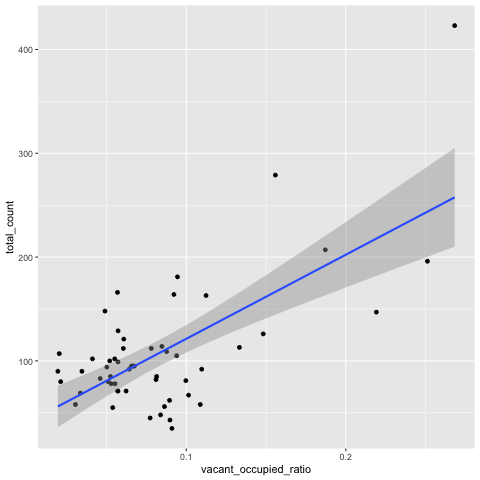

In [47]:
%%R 

plot <- ggplot(df, aes(x = vacant_occupied_ratio, y = total_count)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_count ~ vacant_occupied_ratio, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = retailers_per_1000 ~ vacant_occupied_ratio, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63058 -0.16146 -0.01259  0.17517  0.82168 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.33251    0.07391   4.499 3.77e-05 ***
vacant_occupied_ratio  4.60077    0.75865   6.064 1.43e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2883 on 53 degrees of freedom
Multiple R-squared:  0.4097,	Adjusted R-squared:  0.3985 
F-statistic: 36.78 on 1 and 53 DF,  p-value: 1.429e-07



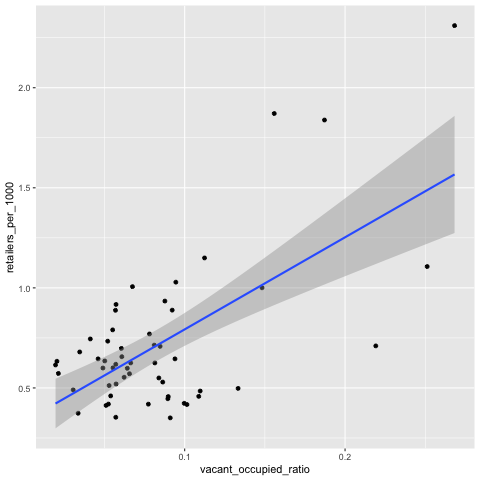

In [78]:
%%R 

plot <- ggplot(df, aes(x = vacant_occupied_ratio, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(retailers_per_1000 ~ vacant_occupied_ratio, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = total_count ~ owner_renter_ratio, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.562 -33.026 -13.363   6.475 315.508 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        107.6079    11.4129   9.429 6.32e-13 ***
owner_renter_ratio  -0.2543    11.2900  -0.023    0.982    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 63.04 on 53 degrees of freedom
Multiple R-squared:  9.57e-06,	Adjusted R-squared:  -0.01886 
F-statistic: 0.0005072 on 1 and 53 DF,  p-value: 0.9821



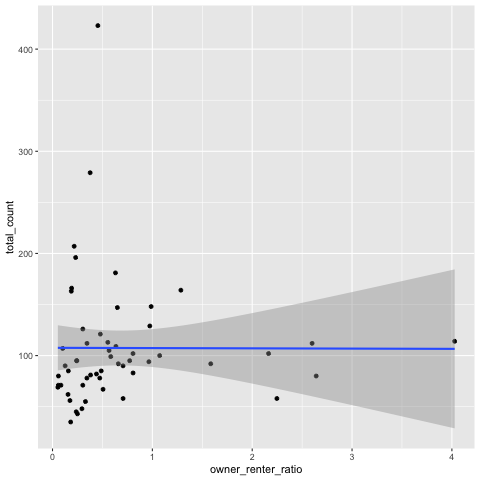

In [48]:
%%R 

plot <- ggplot(df, aes(x = owner_renter_ratio, y = total_count)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(total_count ~ owner_renter_ratio, data = df)
summary(model)

`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = retailers_per_1000 ~ owner_renter_ratio, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37797 -0.20673 -0.09783  0.10461  1.58997 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.73407    0.06781   10.83 4.88e-15 ***
owner_renter_ratio -0.03016    0.06708   -0.45    0.655    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3745 on 53 degrees of freedom
Multiple R-squared:  0.003799,	Adjusted R-squared:  -0.015 
F-statistic: 0.2021 on 1 and 53 DF,  p-value: 0.6549



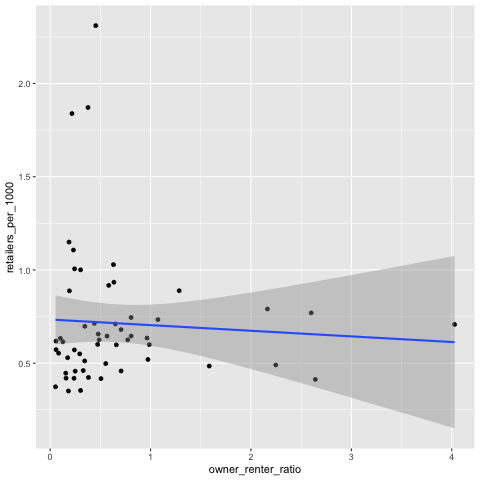

In [79]:
%%R 

plot <- ggplot(df, aes(x = owner_renter_ratio, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(retailers_per_1000 ~ owner_renter_ratio, data = df)
summary(model)

In [62]:
df_counts['perc_owners'] = df_counts['owner']/(df_counts['owner'] + df_counts['renter']) * 100
df_counts.head()

,code,name,Tobacco Retail Dealer Cap,Active Tobacco Retail Dealer Licenses,TRD Available Under Cap,Electronic Cigarette Retail Dealer Cap,Active Electronic Cigarette Retail Dealer Licenses,ECD Available Under Cap,activer per 1000,income,poverty,age_med,population,black_population,asian_population,hispanic_population,occupied_unit,vacant_unit,owner,renter,vacant_occupied_ratio,owner_renter_ratio,total_count,black_pct,asian_pct,hispanic_pct,retailers_per_1000,perc_owners
0,1,Bronx 1&2,99,75,24,18,15,3,0.512358,31651,32.8,41.6,146382,61300,1123,99439,56269,1095,6332,49937,0.019460,0.126800,90,0.418767,0.007672,0.679312,0.614830,11.253088
1,1,Bronx 10,52,65,0,30,37,0,0.474695,61426,18.9,36.6,136930,45796,9397,65555,56040,2306,25013,31027,0.041149,0.806169,102,0.334448,0.068626,0.478748,0.744906,44.634190
2,1,Bronx 11,55,60,0,19,22,0,0.522311,61668,17.6,43.5,114874,31517,12802,55518,44217,3582,13513,30704,0.081010,0.440106,82,0.274361,0.111444,0.483295,0.713826,30.560644
3,1,Bronx 12,66,64,2,21,28,0,0.416152,60483,26.0,35.9,153790,105224,4201,43593,57194,3673,22723,34471,0.064220,0.659192,92,0.684206,0.027316,0.283458,0.598218,39.729692
4,1,Bronx 3&6,103,91,12,15,16,2,0.538487,31120,38.4,36.2,168992,60715,3536,89083,52974,1077,4896,48078,0.020331,0.101835,107,0.359277,0.020924,0.527143,0.633166,9.242270


`geom_smooth()` using formula = 'y ~ x'



Call:
lm(formula = retailers_per_1000 ~ perc_owners, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37231 -0.20982 -0.09301  0.05715  1.59580 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7310601  0.1031147   7.090 3.23e-09 ***
perc_owners -0.0005288  0.0027417  -0.193    0.848    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3751 on 53 degrees of freedom
Multiple R-squared:  0.0007014,	Adjusted R-squared:  -0.01815 
F-statistic: 0.0372 on 1 and 53 DF,  p-value: 0.8478



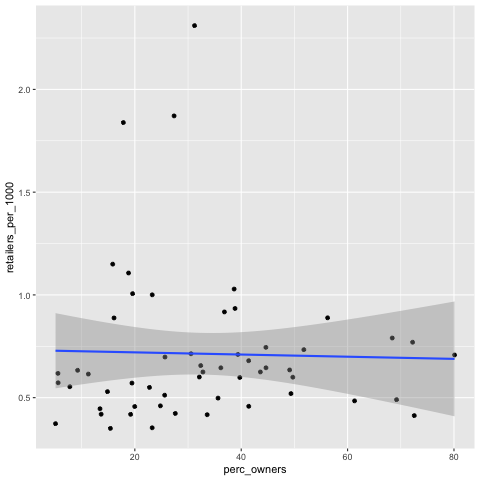

In [80]:
%%R 

plot <- ggplot(df, aes(x = perc_owners, y = retailers_per_1000)) + geom_point() + geom_smooth(method = 'lm')
print(plot)

model <- lm(retailers_per_1000 ~ perc_owners, data = df)
summary(model)

In [58]:
%%R

model <- lm(total_count ~ age_med + black_pct + asian_pct + hispanic_pct + vacant_occupied_ratio, data = df)
summary(model)


Call:
lm(formula = total_count ~ age_med + black_pct + asian_pct + 
    hispanic_pct + vacant_occupied_ratio, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.746 -25.011  -2.875  17.373 162.631 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            30.1073    57.6485   0.522   0.6038    
age_med                 0.9539     1.2689   0.752   0.4558    
black_pct             -83.2476    32.1372  -2.590   0.0126 *  
asian_pct              -5.4569    59.5050  -0.092   0.9273    
hispanic_pct           -2.4154    28.6575  -0.084   0.9332    
vacant_occupied_ratio 749.8673   127.1475   5.898 3.36e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.94 on 49 degrees of freedom
Multiple R-squared:  0.5509,	Adjusted R-squared:  0.5051 
F-statistic: 12.02 on 5 and 49 DF,  p-value: 1.281e-07



In [85]:
%%R

model <- lm(retailers_per_1000 ~ age_med + black_pct + asian_pct + hispanic_pct + vacant_occupied_ratio, data = df)
summary(model)


Call:
lm(formula = retailers_per_1000 ~ age_med + black_pct + asian_pct + 
    hispanic_pct + vacant_occupied_ratio, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59931 -0.11920 -0.01983  0.14907  0.72760 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.088832   0.340681  -0.261  0.79538    
age_med                0.014166   0.007499   1.889  0.06480 .  
black_pct             -0.576984   0.189919  -3.038  0.00381 ** 
asian_pct             -0.256812   0.351652  -0.730  0.46868    
hispanic_pct           0.130487   0.169355   0.770  0.44471    
vacant_occupied_ratio  4.561768   0.751395   6.071 1.82e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2596 on 49 degrees of freedom
Multiple R-squared:  0.5574,	Adjusted R-squared:  0.5122 
F-statistic: 12.34 on 5 and 

49 DF,  p-value: 9.119e-08



In [88]:
%%R

model <- lm(retailers_per_1000 ~ black_pct + vacant_occupied_ratio + income, data = df)
summary(model)


Call:
lm(formula = retailers_per_1000 ~ black_pct + vacant_occupied_ratio + 
    income, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71211 -0.13547 -0.03848  0.12762  0.71820 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.172e-01  1.263e-01   3.304  0.00175 ** 
black_pct             -4.869e-01  1.694e-01

  -2.873  0.00591 ** 
vacant_occupied_ratio  3.628e+00  8.084e-01   4.488 4.12e-05 ***
income                 1.631e-06  1.411e-06   1.156  0.25321    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2619 on 51 degrees of freedom
Multiple R-squared:  0.5313,	Adjusted R-squared:  0.5038 
F-statistic: 19.27 on 3 and 51 DF,  p-value: 1.733e-08




Attaching package: ‘flexplot’

The following object is masked from ‘package:ggplot2’:

    flip_data



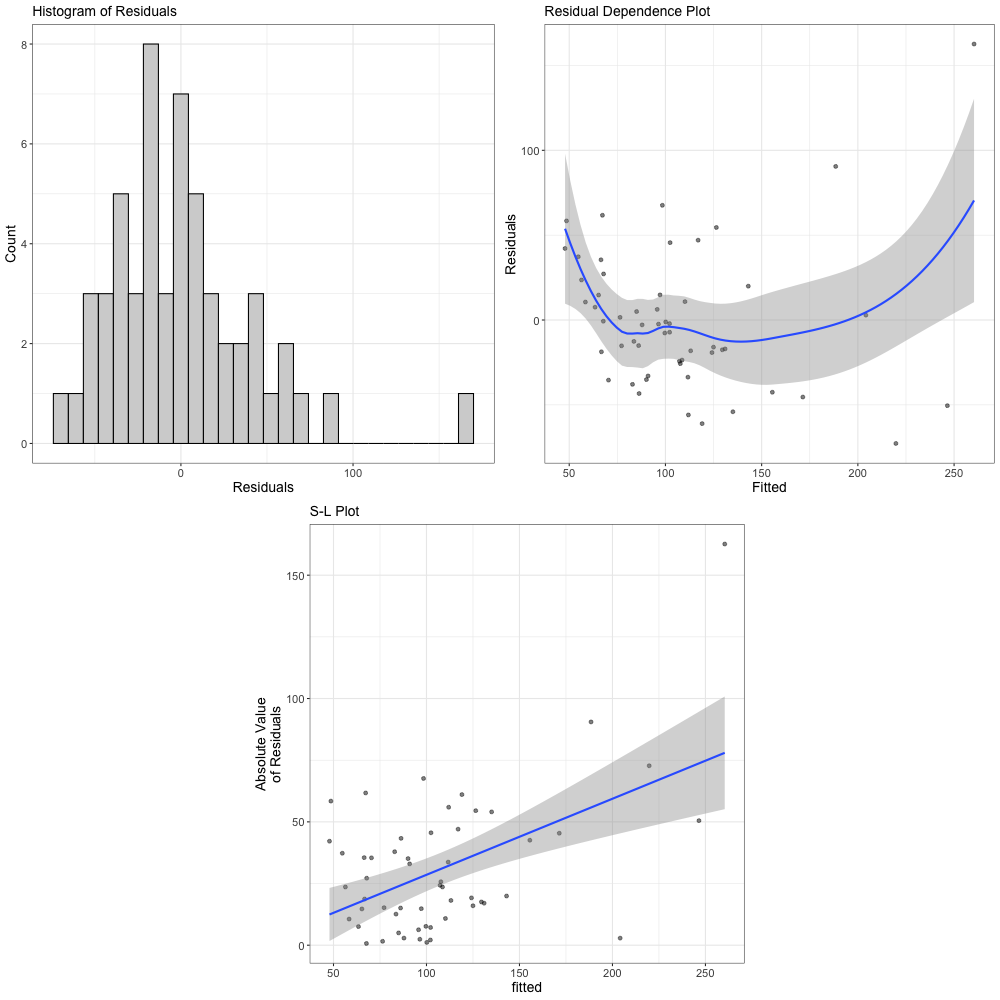

In [59]:
%%R -w 1000 -h 1000

library(flexplot)

visualize(model, plot="residuals")


In [51]:
%%R 

# add residuals and fitted to dataframe

df_fitted <- df %>% mutate(
    fitted = fitted(model),
    residuals = residuals(model)
)

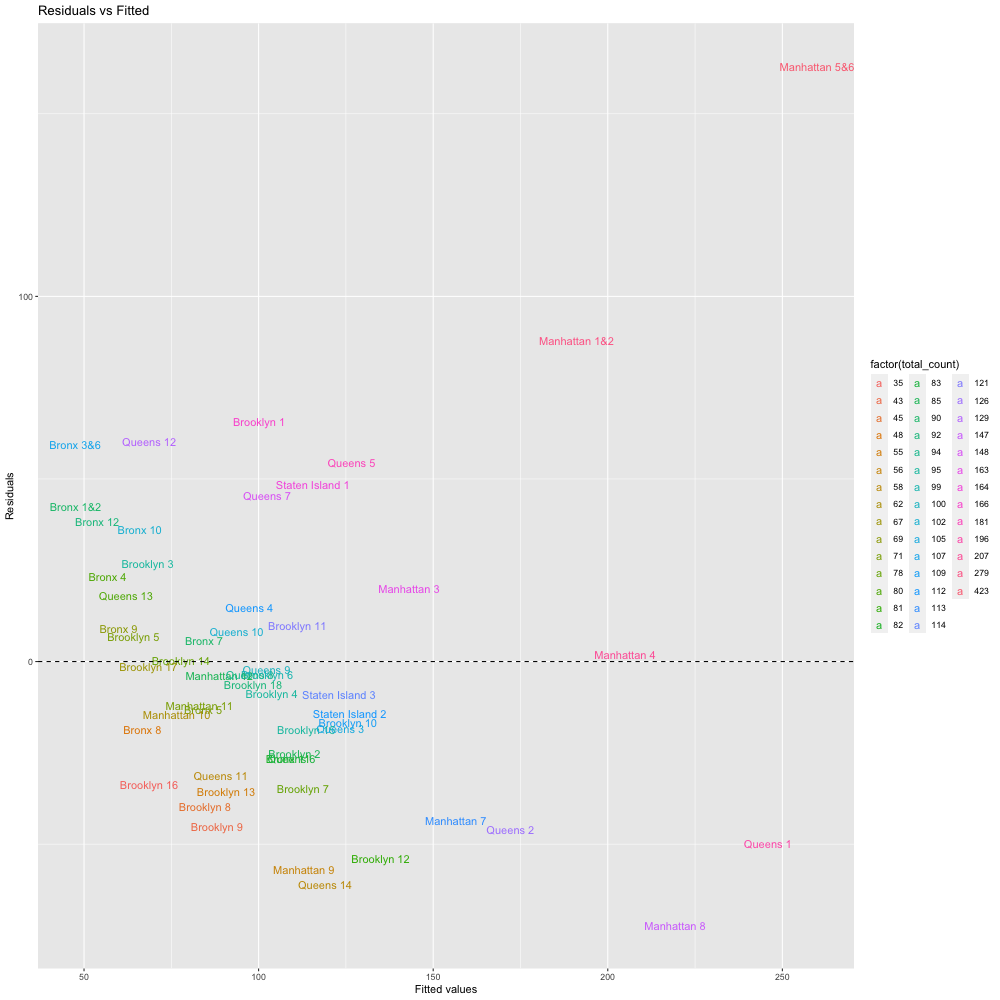

In [54]:
%%R -w 1000 -h 1000


# library(ggrepel)

ggplot(df_fitted) +
    aes(x = fitted, y = residuals, color=factor(total_count)) + 
    # geom_point() + 
    geom_text(aes(label = name)) +
    geom_hline(yintercept = 0, linetype = 'dashed') +
    labs(
        title = 'Residuals vs Fitted',
        x = 'Fitted values',
        y = 'Residuals'
    )
    # geom_smooth(method = 'lm')

# Testing with poisson

In [55]:
%%R
# Loading necessary library
library(stats)

# Assuming 'df' is your data frame and 'counts' is your count data column
# Also assuming the predictors are 'med_age_estimate', 'perc_poverty_estimate', 'perc_owners', and 'perc_ethnic'

# Fitting a Poisson regression model
model_poisson <- glm(total_count ~ age_med + poverty + black_pct + asian_pct + hispanic_pct + owner_renter_ratio + vacant_occupied_ratio, 
                     data = df, 
                     family = poisson(link = "log"))

# Summary of the Poisson model
summary(model_poisson)


Call:
glm(formula = total_count ~ age_med + poverty + black_pct + asian_pct + 
    hispanic_pct + owner_renter_ratio + vacant_occupied_ratio, 
    family = poisson(link = "log"), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.5673  -2.6278  -0.4684   1.5129   7.3552  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            4.272745   0.136245  31.361  < 2e-16 ***
age_med                0.008227   0.002794   2.945  0.00323 ** 
poverty               -0.004638   0.002435  -1.904  0.05688 .  
black_pct             -0.841942   0.081087 -10.383  < 2e-16 ***
asian_pct             -0.101402   0.140665  -0.721  0.47098    
hispanic_pct          -0.098255   0.076923  -1.277  0.20149    
owner_renter_ratio    -0.036512   0.023373  -1.562  0.11825    
vacant_occupied_ratio  4.578026   0.259184  17.663  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson fa

In [56]:
%%R

library(MASS)

# Fitting a Poisson regression model
model_poisson <- glm.nb(total_count ~ age_med + poverty + black_pct + asian_pct + hispanic_pct + owner_renter_ratio + vacant_occupied_ratio, 
                     data = df,
                     init.theta = 1.69,
                     link = "log")

# Summary of the Poisson model
summary(model_poisson)


Call:
glm.nb(formula = total_count ~ age_med + poverty + black_pct + 
    asian_pct + hispanic_pct + owner_renter_ratio + vacant_occupied_ratio, 
    data = df, init.theta = 11.51199404, link = "log")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8666  -0.7216  -0.1879   0.4094   2.0814  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            4.468158   0.454226   9.837  < 2e-16 ***
age_med                0.004466   0.009259   0.482 0.629559    
poverty               -0.003710   0.007369  -0.503 0.614631    
black_pct             -0.872512   0.231470  -3.769 0.000164 ***
asian_pct             -0.182132   0.446376  -0.408 0.683256    
hispanic_pct          -0.085532   0.220610  -0.388 0.698234    
owner_renter_ratio    -0.016259   0.075900  -0.214 0.830375    
vacant_occupied_ratio  3.983432   1.005739   3.961 7.47e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [89]:
sum(df_counts['total_count'])

5909